# Libraries

In [3]:
import os
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Parameters

In [4]:
PATH_FILE = 'https://raw.githubusercontent.com/ginseng666/GeoJSON-TopoJSON-Austria/master/2021/simplified-99.9/laender_999_geo.json'
PATH_DATA = '..\\Data'
PATH_DATA_RAW = os.path.join(PATH_DATA, 'Raw')
GRID_RESOLUTION = 0.1  # Adjust this value to control the grid resolution

# Prepare data

In [5]:
# Read the GeoJSON file of the country
country_gdf = gpd.read_file(PATH_FILE)

# Calculate the bounding box of the country
country_bbox = country_gdf.total_bounds

min_x, min_y, max_x, max_y = country_bbox
x_coords = np.arange(min_x, max_x, GRID_RESOLUTION)
y_coords = np.arange(min_y, max_y, GRID_RESOLUTION)

# Create the grid polygons
grid_polygons = []
for x in x_coords:
    for y in y_coords:
        polygon = Polygon([(x, y), (x + GRID_RESOLUTION, y),
                           (x + GRID_RESOLUTION, y + GRID_RESOLUTION), (x, y + GRID_RESOLUTION)])
        grid_polygons.append(polygon)

# Create a GeoDataFrame from the grid polygons
grid_gdf = gpd.GeoDataFrame(geometry=grid_polygons, crs=country_gdf.crs)

# Perform spatial intersection to keep only grid polygons within the country
grid_within_country = gpd.overlay(grid_gdf, country_gdf, how='intersection')

grid_within_country.to_pickle(os.path.join(PATH_DATA_RAW, 'grid_austria.pkl'))

<Axes: >

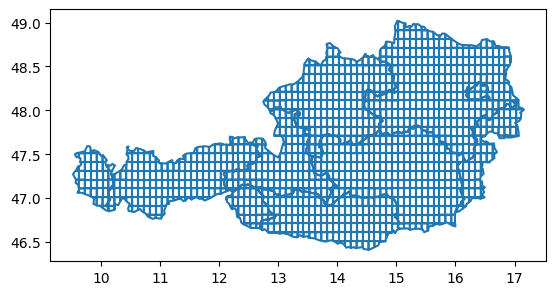

In [8]:
grid_within_country.boundary.plot()